In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
N, D, H= 64, 1000, 100
x = tf.placeholder(tf.float32, shape=(N, D))
y = tf.placeholder(tf.float32, shape=(N, D))
w1 = tf.placeholder(tf.float32, shape=(D, H))
w2 = tf.placeholder(tf.float32, shape=(H, D))
h= tf.maximum(tf.matmul(x,w1), 0)
y_pred = tf.matmul(h, w2)
diff =y_pred-y
loss = tf.reduce_mean(tf.reduce_sum(diff ** 2, axis=1))
grad_w1, grad_w2 = tf.gradients(loss ,[w1, w2])

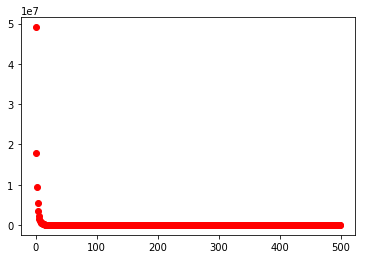

In [4]:
with tf.Session() as sess:
    values = {x: np.random.randn(N, D),
              w1: np.random.randn(D, H),
              w2: np.random.randn(H, D),
               y: np.random.randn(N, D)}
    learning_rate = 1e-5
    loss_summarry=[]
    step=500
    for t in range(step):
        out = sess.run([loss, grad_w1, grad_w2],
                        feed_dict=values)
        loss_val, grad_w1_val, grad_w2_val = out
        values[w1] -= learning_rate * grad_w1_val       
        values[w2] -= learning_rate * grad_w2_val
        loss_summarry.append(loss_val)
    plt.plot(range(step), loss_summarry, 'ro', label='loss_val')
    plt.show()